In [4]:
import time

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

<h1 class="text-center">Modèle d'Ising - BE de simulation stochastique – 16/10/2025 et 13/11/2025</h1>

<br/>

<div class="jumbotron text-center"><b>Le but du BE est de mettre en pratique les algorithmes de simulation stochastique dans l'exemple du modèle d'Ising<br>
Les sections "Pour aller plus loin" sont hors barême et proposent des sujets dont l'étude peut prendre du temps<br>
A rendre sur le LMS pour le 27/11/2025<b></div>

<h1>I. Présentation du modèle et discussion qualitative</h1>

On s'intéresse au **modèle d'Ising** sans champ magnétique externe et sur le tore $\mathcal{T} = (\mathbb{Z}/L\mathbb{Z})^2$ de longueur $L$ en dimension $2$. Dans ce modèle, chaque site $x \in \mathcal{T}$ est doté d'un **spin** $\sigma_x \in \{-1,1\}$. Les sites interagissent via l'**hamiltonien**
$$ H(\sigma) = -\frac{1}{2} \sum_{x \in \mathcal{T}} \sum_{x \sim y} \sigma_x \sigma_y $$
qui définit l'**énergie** de la configuration $\sigma \in \{-1,1\}^{\mathcal{T}}$.

<p class="bg-primary" style="padding:1em"><strong>QUESTION I.1.</strong> Les spins ont-ils plutôt tendance à être alignés ou non ?</p>

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION I.1.</strong> Les spins ont tendance à s'aligner car ça correspond à une configuration de plus faible énergie.</div>

Le système cherche à minimiser son énergie et va se répartir selon la **mesure de Gibbs**
$$ \pi(\sigma) = \frac{1}{Z} e^{-H(\sigma)/T} $$
avec $T$ la **température** du système et $Z$ la constante de normalisation :
$$ Z = \sum_\sigma e^{-H(\sigma)/T}. $$
aussi appelée **fonction de partition** en physique statistique.

<p class="bg-primary" style="padding:1em"><strong>QUESTION I.2.</strong> Décrivez qualitativement le comportement du système, i.e., de la mesure $\pi$, lorsque $T \to 0$ et $T \to \infty$. </p>


<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION I.2.</strong>

- Quand $T \to 0$:

- Quand $T \to \infty$: </div>

Ce modèle "simple" explique notamment le phénomène de magnétisation spontanée de certains métaux comme le fer. Le système est dit magnétisé lorsque beaucoup de spins sont alignés, ou encore quand la **magnétisation nette moyenne** $\langle \lvert M \rvert \rangle$ est grande. Ici, $M$ est la **magnétisation** du système :
$$ M = \frac{1}{L^2} \sum_{x \in \mathcal{T}} \sigma_x $$
et $\langle f \rangle = \sum_\sigma f(\sigma) \pi(\sigma)$ est la moyenne de l'observable $f:\mathcal{T}\to\mathbb{R}$. Le but de ce BE est d'estimer la **température de Curie**, qui est la température au-delà de laquelle un métal perd sa magnétisation et passe donc d'un état dit ferromagnétique à un état dit paramagnétique.

<h1>II. Méthode directe</h1>

Une première méthode pour calculer cette magnétisation nette moyenne consiste à tout calculer explicitement : après tout, on a affaire à des sommes finies!

<p class="bg-primary" style="padding:1em"><strong>QUESTION II.1.</strong> Utilisez la fonction <code>Z</code> ci-dessous pour calculer la valeur de la fonction de partition. Jusqu'à quelle valeur de $L$ pouvez-vous aller pour obtenir une valeur de la fonction de partition en moins d'une minute ? Qu'en concluez-vous ?</p>

In [5]:
def get_state(i,L):
    """
    Il y a 2**(L**2) états possibles
    i : entier entre 0 et 2**(L**2)-1 qui représente un état, renvoyé par cette fonction
    """
    s = np.zeros((L,L))
    for j in range(L**2):
        a = int(j/L)
        b = j-a*L
        binary = i%2
        s[a,b] = 2*binary-1
        i = i>>1
    return s

def H(state):
    """
    Calcule l'hamiltonien du système
    """
    h = 0
    for x in [(1,0), (0,1), (-1,0), (0,-1)]:
        s = np.roll(state, x, axis=(0,1))
        h += sum(sum(np.multiply(state, s)))
    return -h/2

def Z(L, T=1):
    """
    Calcule la fonction de partition du système
    """
    ans=0
    for i in range(2**(L**2)):
        state = get_state(i,L)
        ans += np.exp(-H(state)/T)
    return ans

In [6]:
for L in range(1,5):
    start = time.time()
    Z(int(L))
    end = time.time()
    print(f"Time elpased for L={L}", end - start)

print("Way too much time elapsed for L=5. Didn't converge after 15 minutes.")

Time elpased for L=1 0.0003075599670410156
Time elpased for L=2 0.0012731552124023438
Time elpased for L=3 0.06068563461303711
Time elpased for L=4 5.544125080108643
Way too much time elapsed for L=5. Didn't converge after 15 minutes.


<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION II.1.</strong> La première méthode qui consiste à calculer explicitement la fonction de partition du système est plutôt lente. On ne peut aller que jusqu'à L=4.</div>

<p class="bg-primary" style="padding:1em"><strong>QUESTION II.2.</strong> Le code suivant trace l'évolution de la fonction de partition en fonction de la température pour $L=3$. Commentez les résultats obtenus.</p>

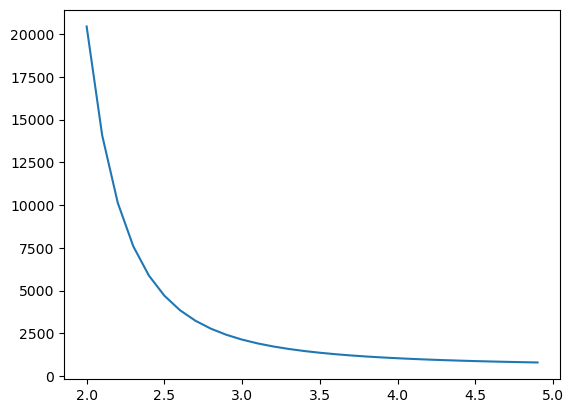

In [7]:
L = 3
tmin = 2
tmax = 5
temperature = np.arange(tmin,tmax,.1)
z = np.zeros(len(temperature))
for i in range(len(temperature)):
    z[i] = Z(L, T=temperature[i])
fig = plt.figure()
plt.plot(temperature, z)
plt.show()
plt.close(fig)

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION II.2.</strong> Comme on a pu l'analyser analytiquement: 

- $Z \to 0$ quand $T \to \infty$

- $Z \to \infty$ quand $T \to 0$ </div>

<p class="bg-primary" style="padding:1em"><strong>QUESTION II.3.</strong> Complétez le code suivant pour calculer la magnétisation moyenne et la magnétisation nette moyenne du système. Quelles valeurs trouvez-vous pour la magnétisation ? Expliquez ce résultat et commentez la courbe obtenue pour la magnétisation nette.</p>

In [35]:
def magnetization(L,T=1):
    """
    Calcule la magnétisation moyenne et la magnétisation nette moyenne
    """
    mag = 0
    mag_n = 0
    Z = 0
    # On parcourt tous les états
    for i in range(2**(L**2)):
        state = get_state(i,L)
        # if i <=5:
        #     print(state)
        Z += np.exp(-H(state)/T)
        mag +=  np.exp(-H(state)/T) * np.sum(state) / L**2
        mag_n +=  np.exp(-H(state)/T) * abs(np.sum(state)) / L**2
    mag_n /= Z
    return mag, mag_n

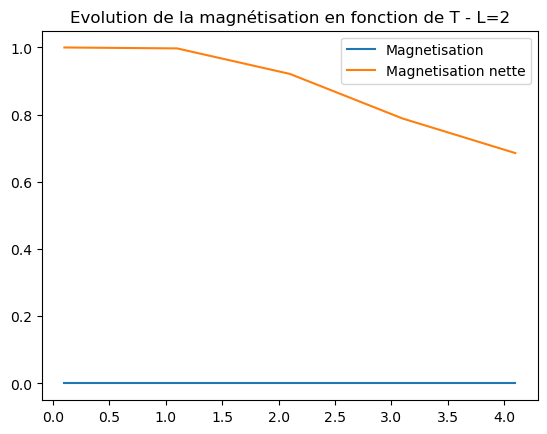

In [36]:
L = 2
temperature = np.arange(.1,5,1)
mag = np.zeros(len(temperature))
mag_n = np.zeros(len(temperature))
for i in range(len(temperature)):
    mag[i], mag_n[i] = magnetization(L,T=temperature[i])

fig = plt.figure()
plt.plot(temperature, mag, label='Magnetisation')
plt.plot(temperature, mag_n, label='Magnetisation nette')
plt.legend()
plt.title("Evolution de la magnétisation en fonction de T - L=%i"%L)
plt.show()
plt.close(fig)

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION II.3.</strong> 

La magnétisation est toujours nulle et reste constante suivant la température.

La magnétisation nette moyenne est constante suivant la température.



</div>

<p class="bg-primary" style="padding:1em"><strong>QUESTION II.4.</strong> Complétez le code suivant pour générer une configuration tirée selon $\pi$. Dessinez quelques configurations tirées au hasard pour différentes valeurs de température et commentez les résultats obtenus.</p>

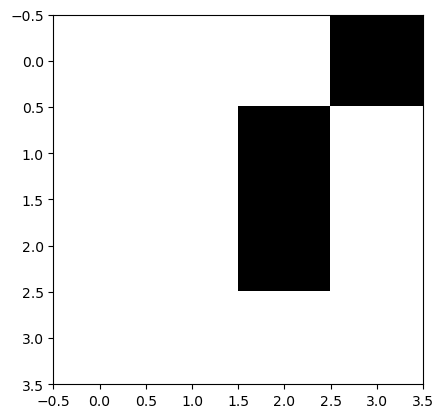

In [39]:
def sample_pi(L,T=1):
    """
    Cette fonction renvoie une configuration distribuée selon la mesure de Gibbs pi
    """
    N = 2**(L**2)

    weights = np.zeros(N)
    for i in range(N):
        state = get_state(i,L)
        E = H(state)
        weights[i] = np.exp(-E/T)
    
    weights /= np.sum(weights)
    choice = np.random.choice(N, p=weights)

    return get_state(choice, L)

L = 4
state = sample_pi(L,T=3)
fig = plt.figure()
plt.imshow(state, cmap="binary")
plt.show()
plt.close(fig)

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION II.4.</strong> ÉCRIVEZ VOTRE RÉPONSE ICI</div>

<h1> III. Méthode du rejet</h1>

Pour aller au-delà de $L = 4$, on va donc chercher une autre méthode. On étudie dans cette partie la méthode du rejet. L'algorithme est le suivant :
1. Générer une configuration $\sigma$ uniformément au hasard
2. Générer $U \in [0,1]$ uniformément au hasard
3. Si $e^{-H(\sigma) / T} > MU$, on accepte $\sigma$, sinon on recommence à l'étape 1


<p class="bg-primary" style="padding:1em"><strong>QUESTION III.1.</strong> Quelle valeur de $M$ faut-il prendre pour que l'état $\sigma$ renvoyé soit bien distribué selon $\pi$? Vous justifierez votre réponse.</p>




<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION III.1.</strong> 

Il faut prendre $M = Z$. Dans ce cas, $e^{-H(\sigma) / T} > MU$ équivaut à dire que la configuration étudiée est plus grande que $\pi(\sigma)$. Dans le cas contraire, on aurait une configuration inférieure au minimum physiquement atteignable, donc impossible (d'où le rejet de cette configuration).

</div>



<p class="bg-primary" style="padding:1em"><strong>QUESTION III.2.</strong> Exprimez le nombre moyen de rejets effectués avant d'accepter un état en fonction de la fonction de partition. Complétez le code suivant pour calculer le nombre moyen de rejets pour $L=2,3,4$ et commentez les résultats obtenus.</p>




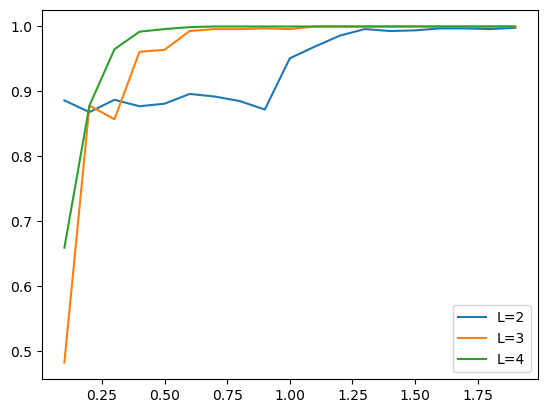

In [53]:
fig = plt.figure()
tmin = 0.1
tmax = 2
temperature = np.arange(tmin,tmax,.1)
for L in [2, 3, 4]:
    Z_L = Z(L)
    nb_rejets = np.zeros(len(temperature))
    for i, T in enumerate(temperature):
        n_trials = 1000
        n_rejects = 0
        for _ in range(n_trials):
            U = np.random.random()
            j = np.random.choice(np.arange(2**(L**2)))
            state = get_state(j, L)
            if np.exp(-H(state)/T) <= Z_L * U:
                n_rejects += 1
        nb_rejets[i] = n_rejects / n_trials  # rejection rate
    plt.plot(temperature, nb_rejets, label=f"L={L}")
plt.legend()
plt.show()
plt.close(fig)

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION III.2.</strong> ÉCRIVEZ VOTRE RÉPONSE ICI</div>

<p class="bg-primary" style="padding:1em"><strong>QUESTION III.3.</strong> Complétez le code ci-dessous. Comment utiliser la fonction <code>rejet_Ising</code> pour estimer la magnétisation nette moyenne ? Quel résultat théorique justifie votre estimation ? Pour $L=2,3,4$, quelle est la précision de votre estimation pour différentes valeurs de la température tout en gardant des temps de calcul raisonnables, typiquement &lt;10s?</p>

In [ ]:
# Simulation du modèle d'Ising par méthode du rejet: algo 1.20 des notes de cours
def rejet_Ising(L, T=1):
    """
    Cette fonction renvoie :
    - X : une configuration distribuée selon pi par la méthode du rejet
    - nb_rejets : le nombre de rejets effectués avant d'accepter la configuration
    """
    # TO DO
    return X, nb_rejets

In [ ]:
taille_echantillon = 10**2
for L in [2,3,4]:
    for t in [1,2,3,4]:
        estimation = # TO DO
        m, mn = magnetization(L,T=t)
        print("L=%i, T=%.1f" % (L, T))
        print("- Estimation: %f" %estimation)
        print("- Vraie valeur: %f" %mn)
        print("- Erreur relative: %.2f%%" % (100*(estimation-mn)/mn))

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION III.3.</strong> ÉCRIVEZ VOTRE RÉPONSE ICI</div>

<p class="bg-primary" style="padding:1em"><strong>QUESTION III.4.</strong> Les calculs pour $L=5$ se font-ils en un temps raisonnable ? Si non, qu'est-ce qui prend du temps ? Si oui, jusqu'à quelle taille de grille pouvez-vous tracer l'évolution de la magnétisation nette moyenne en fonction de la température ?</p>

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION III.4.</strong> ÉCRIVEZ VOTRE RÉPONSE ICI</div>

<h1> IV. Dynamique de Glauber</h1>

On propose notamment l'algorithme de Metropolis-Hastings suivant :
1. à chaque étape, on choisit un site $x \in \mathcal{T}$ uniformément au hasard
2. si l'état du système est $\sigma$, on considère l'état $\sigma'$ obtenu en flippant le spin de $x$, i.e., $\sigma'_y = \sigma_y$ pour $y \neq x$ et $\sigma'_x = - \sigma_x$ et on passe de $\sigma$ à $\sigma'$ avec probabilité
$$ \min \left( 1, \exp \left( -\frac{1}{T} \left( H(\sigma') - H(\sigma) \right) \right) \right) $$
sinon on reste en $\sigma$.

<p class="bg-primary" style="padding:1em"><strong>QUESTION IV.1.</strong> Quelle est la probabilité invariante de cette chaîne de Markov ? Vous justifierez votre réponse.</p>

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION IV.1.</strong> ÉCRIVEZ VOTRE RÉPONSE ICI</div>


<p class="bg-primary" style="padding:1em"><strong>QUESTION IV.2.</strong> Avec les notations précédentes, montrez que $H(\sigma') - H(\sigma) = 2\sigma_x \sum_{y \sim x} \sigma_y$ et que $M(\sigma') - M(\sigma) = -\frac{2\sigma_x}{L^2}$. Quel est l'intérêt de ces formules, notamment de la première ?</p>

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION IV.2.</strong> ÉCRIVEZ VOTRE RÉPONSE ICI</div>



<p class="bg-primary" style="padding:1em"><strong>QUESTION IV.3.</strong> Complétez le code de la fonction <code>Glauber</code>. Pour la vérifier, vous comparerez pour $L=3$ avec $T=1$ et $T=6$ l'erreur relative de votre estimation. De quel(s) résultat(s) théorique(s) avez-vous besoin pour justifier que vous êtes bien en train d'estimer la magnétisation ?</p>

In [ ]:
def Glauber(state, nb_steps=1, T=1):
    """
    Cette fonction fait nb_steps de la chaîne de Markov décrite ci-dessus
    en partant de l'état initial state
    Elle renvoie :
    - state: l'état final
    - mag: une suite de longueur nb_steps+1 avec l'évolution de la magnétisation au cours du temps
    - en: une suite de longueur nb_steps+1 avec l'évolution de l'énergie au cours du temps
    """
    L = state.shape[0]
    mag = np.zeros(nb_steps+1) # on suit l'évolution de la magnétisation
    en = np.zeros(nb_steps+1) # on suit l'évolution de l'énergie
    mag[0] = sum(sum(state))/L**2 # magnétisation initiale    
    en[0] = H(state)/L**2 # énergie initiale
    for i in range(nb_steps):
        # TO DO : une itération de la dynamique de Glauber
        mag[i+1] = # TO DO
        en[i+1] = # TO DO
    return state, mag, en

def random_init(L):
    """
    Cette fonction renvoie un état initial uniformément réparti
    """
    return np.random.choice((-1,1), size=(L,L))

def det_init(L):
    """
    Renvoie l'état initial avec tous les spins = +1
    """
    return np.ones((L,L))

In [ ]:
L = 3
for t in (1,6):
    state, mag, en = Glauber(random_init(L), nb_steps=10**4, T=t)
    estimation = # TO DO
    m, mn = magnetization(L,T=t)

    print("t=%f"%t)
    print("-  Estimation: %f" %estimation)
    print("-  Vraie valeur: %f" %mn)
    print("-  Erreur relative: %.2f%%" % (100*(estimation-mn)/mn))

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION IV.3.</strong> ÉCRIVEZ VOTRE RÉPONSE ICI</div>


<p class="bg-primary" style="padding:1em"><strong>QUESTION IV.4.</strong> Tracez l'évolution de l'erreur relative en fonction de la température : pour quelles valeurs de la température votre estimation est la moins précise ?</p>

In [ ]:
L = 3
temperature = np.arange(.1,6,.5)
err_rel = np.zeros(len(temperature))
for i in range(len(temperature)):
    t = temperature[i]
    m, mn = magnetization(L,T=t)
    state, mag, en = Glauber(random_init(L), nb_steps=10**4, T=t)
    estimation = # TO DO
    err_rel[i] = (estimation - mn)/mn

fig = plt.figure()
plt.plot(temperature, err_rel)
plt.show()
plt.close(fig)

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION IV.4.</strong> ÉCRIVEZ VOTRE RÉPONSE ICI</div>


<p class="bg-primary" style="padding:1em"><strong>QUESTION IV.5.</strong> Faites quelques tirages du système selon la mesure de Gibbs pour $L=100$ et $T =.1, .5, 1, 2, 3, 4, 5$ et commentez les images obtenues. Comparez avec votre réponse à la question I.1.</p>

In [ ]:
L = 100
temperature = (.05,.1)
for t in temperature:
    state, m, e = Glauber(random_init(L), T=t, nb_steps=10*L**2)
    fig = plt.figure()
    plt.imshow(state, cmap='binary')
    plt.show()
    plt.close(fig)

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION IV.5.</strong> ÉCRIVEZ VOTRE RÉPONSE ICI</div>


<p class="bg-primary" style="padding:1em"><strong>QUESTION IV.6.</strong> Utilisez le code suivant pour tracer l'évolution de la magnétisation au cours du temps pour $L=10$, nb_steps=$10^5$, $T = .1, 1, 2, 3, 4$ et un état initial déterministe. Commentez les résultats obtenus. Pour $T=2$, relancez le script jusqu'à voir un changement d'état du système. Combien de fois avez-vous dû relancer le script ?</p>

In [ ]:
# Évolution de la magnétisation au cours du temps
L = 10
state, mag, en = Glauber(det_init(L), nb_steps=10**5, T=2)
fig = plt.figure()
plt.plot(range(len(mag)), mag)
plt.show()
plt.close(fig)

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION IV.6.</strong> ÉCRIVEZ VOTRE RÉPONSE ICI</div>

<p class="bg-primary" style="padding:1em"><strong>QUESTION IV.7.</strong> Complétez le code suivant pour tracer l'évolution de la magnétisation nette moyenne en fonction de la température. Vous justifierez que votre code produit bien une estimation de la magnétisation nette moyenne, et vous commenterez les résultats obtenus.</p>

In [ ]:
L = 10
temperature = np.arange(.1,5,.1)
magnetization = np.zeros(len(temperature))
for i in range(len(temperature)):
    state, mag, en = Glauber(det_init(L), nb_steps=10**4, T=temperature[i])
    magnetization[i] = # TO DO

fig = plt.figure()
plt.plot(temperature, magnetization)
plt.show()
plt.close(fig)

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION IV.7.</strong> ÉCRIVEZ VOTRE RÉPONSE ICI</div>

<p class="bg-primary" style="padding:1em"><strong>QUESTION IV.8.</strong> Justifiez les valeurs de la magnétisation nette moyenne dans les régimes de basse et haute température. Justifiez le terme "transition de phase". Dans quelle région de température a-t-elle lieu ?</p>

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION IV.8.</strong> ÉCRIVEZ VOTRE RÉPONSE ICI</div>

<h1> V. Pour aller plus loin : algorithme de Wolff</h1>

Ce qui ralentit fortement la dynamique de Glauber, notamment pour des températures inférieures à la température de Curie, est le fait que l'on change au plus un spin à la fois et que la plupart des changements sont en fait rejetés. L'algorithme de Wolff vise à palier ces deux problèmes. L'algorithme est le suivant :
1. on choisit un site $x$ uniformément au hasard, qui constitue notre cluster initial, et on dit que $x$ est non exploré;
2. on prend un point du cluster non exploré (n'importe lequel), et, pour chacun de ses voisins qui n'est pas dans le cluster et qui a le même spin, on ajoute ce voisin dans le cluster avec probabilité $p$. Les voisins ajoutés sont non explorés, et le point choisi est exploré;
3. on répète l'étape 2 tant qu'il y a des voisins potentiels;
4. on change le signe de tous les sites du cluster ainsi grandi.

<p class="bg-primary" style="padding:1em"><strong>QUESTION V.1.</strong> Vérifiez que pour $p=1-e^{-2/T}$, la distribution invariante de cette chaîne de Markov est bien $\pi$.</p>

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION V.1.</strong> ÉCRIVEZ VOTRE RÉPONSE ICI</div>



<p class="bg-primary" style="padding:1em"><strong>QUESTION V.2.</strong> Implantez cet algorithme et donnez une estimation de la température de Curie.</p>

<div class="alert alert-warning"><strong>RÉPONSE A LA QUESTION V.2.</strong> ÉCRIVEZ VOTRE RÉPONSE ICI</div>


